In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from implementation import NeuralNet
np.random.seed(0)

In [2]:
#for input from CSV file.
# data = np.genfromtxt("../data/train.csv", delimiter=",", skip_header=1, dtype=int)
# labels = data[:,0]
# images = data[:,1:]/255

# length = int(len(labels)*.9) #Train on the first 90%. Test on 10%
# training_labels, test_labels = labels[:length], labels[length:]
# training_images, test_images = images[:length], images[length:]

In [3]:
#for input from directly fetching mnist
mnist = fetch_openml('mnist_784', as_frame=False)
labels = mnist.target.astype(int)
images = mnist.data/255

length = 60_000 #Train on 60k, test on 10k
training_labels, test_labels = labels[:length], labels[length:]
training_images, test_images = images[:length], images[length:]

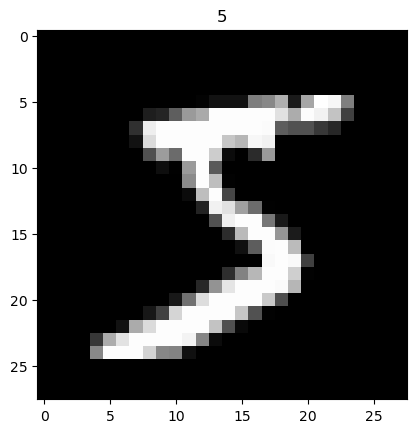

In [4]:
def plot_image(i):
    plt.imshow(images[i,:].reshape(28,28), cmap="gray")
    plt.title(labels[i])
    plt.show()
plot_image(0)

In [5]:
net = NeuralNet([784, 300, 300, 10])
net.evaluate((test_labels, test_images))

0.1113

In [6]:
%%time
net.train(training_data=(training_labels, training_images), iterations=1, batch_size=10, learning_rate=0.1)
net.evaluate((test_labels, test_images))

CPU times: total: 1min 7s
Wall time: 2min 26s


0.9108

In [7]:
# net.export_csv()
import pandas as pd
print(np.shape(net.biases[0]))
print(np.shape(net.biases[1]))
print(np.shape(net.biases[2]))

print(np.shape(net.weights[0]))
print(np.shape(net.weights[1]))
print(np.shape(net.weights[2]))

def export_csv(net):
    print(net.biases)
    df_biases_a1 = pd.DataFrame(net.biases[0])
    df_biases_a2 = pd.DataFrame(net.biases[1])
    df_biases_o = pd.DataFrame(net.biases[2])
    print(net.weights)
    df_weight_a1 = pd.DataFrame(net.weights[0])
    df_weight_a2 = pd.DataFrame(net.weights[1])
    df_weight_o = pd.DataFrame(net.weights[2])

    df_biases_a1.to_csv('../data/biases_a1.csv', index=False)
    df_biases_a2.to_csv('../data/biases_a2.csv' , index=False)
    df_biases_o.to_csv('../data/biases_o.csv', index=False)

    df_weight_a1.to_csv('../data/weights_a1.csv', index=False)
    df_weight_a2.to_csv('../data/weights_a2.csv', index=False)
    df_weight_o.to_csv('../data/weights_o.csv', index=False)
    return

export_csv(net)

(300,)
(300,)
(10,)
(300, 784)
(300, 300)
(10, 300)
[array([ 1.76629439,  0.47306945,  0.91440738,  2.32049923,  1.81846695,
       -0.80777031,  0.93828552, -0.25669725, -0.29903029,  0.35146054,
        0.24417596,  1.40878151,  0.82351787,  0.028157  ,  0.45559881,
        0.50634546,  1.45563657, -0.1075835 ,  0.17101032, -0.75184825,
       -2.63175385,  0.64878554,  0.79479579, -0.78308583,  2.14172406,
       -1.37255494, -0.01468248, -0.11038151,  1.60174669,  1.42795078,
       -0.02675311,  0.47799506, -0.96483765, -2.01408906, -0.23546645,
        0.45453675,  1.15860794,  1.30013574, -0.49805977, -0.46558141,
       -1.14665628, -1.21105101, -1.68231557,  2.05216709, -0.57970892,
       -0.72907187, -1.2315477 ,  0.79762656, -1.72130791, -0.11070928,
       -1.01927399,  0.34101137, -0.54190321, -1.21388599,  0.029156  ,
        0.41930139,  0.07925238,  0.15692315, -0.81226498, -0.2017422 ,
       -0.85844819, -0.33479189, -0.84552639, -1.64376795,  0.0700952 ,
       -0.4